In [2]:
import glob
import torch
import numpy as np
import torchvision.utils as vutils
import matplotlib.pyplot as plt
from checkpoint_utils import construct_gan_from_checkpoint, construct_classifier_from_checkpoint

In [3]:
device = torch.device('cpu')

In [4]:
g_list = []
paths = [g_path for g_path in glob.glob('../out/exp1_7v1/classifier.7v1_0.6/[0-9]*')]
paths.sort()

for g_path in paths:
    g, _, _, _ = construct_gan_from_checkpoint(g_path, device=device)
    g.eval()
    g_list.append(g)

Loading GAN from ../out/exp1_7v1/classifier.7v1_0.6/00 ...
Loading GAN from ../out/exp1_7v1/classifier.7v1_0.6/01 ...
Loading GAN from ../out/exp1_7v1/classifier.7v1_0.6/02 ...
Loading GAN from ../out/exp1_7v1/classifier.7v1_0.6/03 ...
Loading GAN from ../out/exp1_7v1/classifier.7v1_0.6/04 ...
Loading GAN from ../out/exp1_7v1/classifier.7v1_0.6/05 ...
Loading GAN from ../out/exp1_7v1/classifier.7v1_0.6/06 ...
Loading GAN from ../out/exp1_7v1/classifier.7v1_0.6/07 ...
Loading GAN from ../out/exp1_7v1/classifier.7v1_0.6/08 ...
Loading GAN from ../out/exp1_7v1/classifier.7v1_0.6/09 ...
Loading GAN from ../out/exp1_7v1/classifier.7v1_0.6/10 ...
Loading GAN from ../out/exp1_7v1/classifier.7v1_0.6/11 ...
Loading GAN from ../out/exp1_7v1/classifier.7v1_0.6/12 ...
Loading GAN from ../out/exp1_7v1/classifier.7v1_0.6/13 ...
Loading GAN from ../out/exp1_7v1/classifier.7v1_0.6/14 ...
Loading GAN from ../out/exp1_7v1/classifier.7v1_0.6/15 ...
Loading GAN from ../out/exp1_7v1/classifier.7v1_0.6/16 .

In [5]:
c, _, _, _ = construct_classifier_from_checkpoint('../out/exp1_7v1/classifier.7v1.pth', device=device)

Loading model from ../out/exp1_7v1/classifier.7v1.pth ...
Model classifier.simple.7v1
	> Params:  {'nc': 1, 'nf': 1}


In [6]:
z = torch.randn(1000, 100, 1, 1, device=device)

new_gi = g_list[-1](z).detach().cpu()
old_gi = g_list[0](z).detach().cpu()


old_c_output = c(old_gi)
new_c_output = c(new_gi)

new_term_2 = (0.5 - new_c_output).abs().detach().cpu().numpy()
old_term_2 = (0.5 - old_c_output).abs().detach().cpu().numpy()

diff_term_2 = new_term_2 - old_term_2

ind = np.argsort(diff_term_2, axis=0)

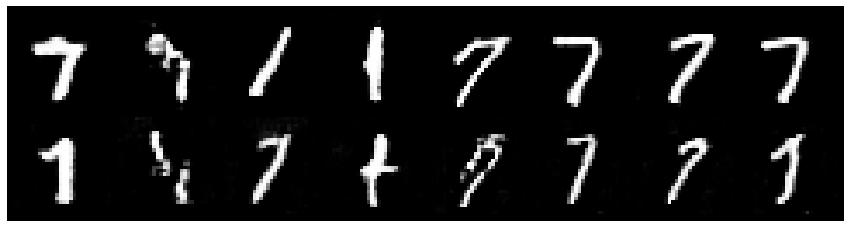

Pos class -> 7
Neg class -> 1
Before		After
0.9998   0.5089
0.9910   0.5012
0.0017   0.4913
0.0014   0.4910
0.9996   0.5110
1.0000   0.4880
0.9998   0.4879
1.0000   0.4860


In [7]:
old = old_gi[ind[0:8]]
new = new_gi[ind[0:8]]

gi = torch.vstack((old, new))

gr = vutils.make_grid(gi, padding=2, normalize=True)

plt.figure(figsize=(15,15))
plt.axis("off")
plt.imshow(np.transpose(gr, (1,2,0)))
plt.show()

old_out = c(old.to(device))
new_out = c(new.to(device))

print('Pos class ->', 7)
print('Neg class ->', 1)
print('Before\t\tAfter')
for old, new in zip(old_out, new_out):
  print('%.4f   %.4f' % (old.item(), new.item()))